In [15]:
# STEP 1: Import package code
library(ggplot2)
# Change the default plot size
options(repr.plot.width=4, repr.plot.height=4)

In [16]:
# STEP 2: Read in the seed phenotype data from a file
# read.table reads data from a text file into an R data frame
seed.pheno = read.table(file = "./examples/plantcv_seed_phenotypes.table", sep = "\t", header = TRUE)
head(seed.pheno) # Previews the top of the data frame

genotype,HEADER_SHAPES,area,hull.area,solidity,perimeter,width,height,longest_axis,center.of.mass.x,center.of.mass.y,hull_vertices,in_bounds,ellipse_center_x,ellipse_center_y,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,marker_area
Cs002,SHAPES_DATA,1655,1618.5,1.0225517,166.6102,40,62,62,2154.579,2451.401,26,True,2154.481,2451.103,66.75710,30.41299,156.244919,0.8901964,207801
Cs002,SHAPES_DATA,1657,1633.0,1.0146969,163.6812,55,47,49,2524.626,2384.845,25,True,2524.716,2384.752,63.24441,32.10065,53.203114,0.8616134,207801
Cs002,SHAPES_DATA,979,937.0,1.0448239,125.5980,49,24,48,1623.824,2319.848,19,True,1624.177,2319.813,51.35154,23.20172,81.575706,0.8921085,207801
Cs002,SHAPES_DATA,953,925.0,1.0302703,130.0833,24,52,52,1683.022,2302.978,18,True,1683.099,2302.573,53.56529,21.67561,9.000335,0.9144682,207801
Cs002,SHAPES_DATA,927,907.5,1.0214876,131.8822,32,50,48,2119.455,2269.763,24,True,2119.288,2269.406,54.65794,20.67560,156.044724,0.9256943,207801
Cs002,SHAPES_DATA,2200,2764.5,0.7958039,252.6518,61,69,58,1753.735,2240.008,22,True,1755.812,2238.624,69.78819,50.83885,149.902786,0.6850740,207801


In [17]:
# STEP 3: Normalize the seed area by the marker area to account for differences between cameras
# Add a new column (norm_area) to the data frame
# In R, mathmatical operations can be done on vectors, in this case dividing the values of the area column
# by the values in the marker_area column
# Scroll to the right in the output to see the new column
seed.pheno$norm_area = seed.pheno$area / seed.pheno$marker_area
head(seed.pheno)

genotype,HEADER_SHAPES,area,hull.area,solidity,perimeter,width,height,longest_axis,center.of.mass.x,⋯,hull_vertices,in_bounds,ellipse_center_x,ellipse_center_y,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity,marker_area,norm_area
Cs002,SHAPES_DATA,1655,1618.5,1.0225517,166.6102,40,62,62,2154.579,⋯,26,True,2154.481,2451.103,66.75710,30.41299,156.244919,0.8901964,207801,0.007964351
Cs002,SHAPES_DATA,1657,1633.0,1.0146969,163.6812,55,47,49,2524.626,⋯,25,True,2524.716,2384.752,63.24441,32.10065,53.203114,0.8616134,207801,0.007973975
Cs002,SHAPES_DATA,979,937.0,1.0448239,125.5980,49,24,48,1623.824,⋯,19,True,1624.177,2319.813,51.35154,23.20172,81.575706,0.8921085,207801,0.004711238
Cs002,SHAPES_DATA,953,925.0,1.0302703,130.0833,24,52,52,1683.022,⋯,18,True,1683.099,2302.573,53.56529,21.67561,9.000335,0.9144682,207801,0.004586118
Cs002,SHAPES_DATA,927,907.5,1.0214876,131.8822,32,50,48,2119.455,⋯,24,True,2119.288,2269.406,54.65794,20.67560,156.044724,0.9256943,207801,0.004460999
Cs002,SHAPES_DATA,2200,2764.5,0.7958039,252.6518,61,69,58,1753.735,⋯,22,True,1755.812,2238.624,69.78819,50.83885,149.902786,0.6850740,207801,0.010587052


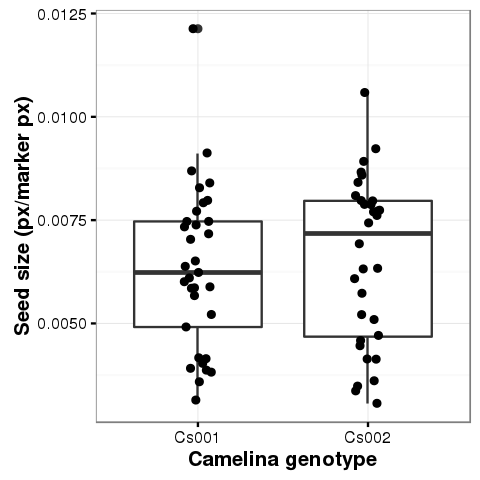

In [18]:
# STEP 4: Plot the distribution of seed size by genotype
# Provide ggplot with the data frame, and use aes to map the genotype and norm_area columns to the x and y variables
seed.boxplot = ggplot(seed.pheno, aes(x = genotype, y = norm_area)) + 
               # Use the boxplot plotting feature
               geom_boxplot() +
               # Add the y values as a scatterplot and "jitter" the points along the x-axis
               geom_jitter(width = 0.2) +
               # Provide a better x-axis label
               scale_x_discrete("Camelina genotype") +
               # Provide a better y-axis label
               scale_y_continuous("Seed size (px/marker px)") +
               # Change the plotting theme (black and white theme)
               theme_bw() +
               # Adjust the theme to bold the axis titles
               theme(axis.title.x = element_text(face = 'bold'), 
                     axis.title.y = element_text(face = 'bold'))
print(seed.boxplot)

In [19]:
# STEP 5: Is there a significant difference between genotypes?
# The aov function does an analysis of variance test on the linear model norm_area varies by genotype
seed.aov = aov(norm_area ~ genotype, data = seed.pheno)
print(seed.aov)
summary(seed.aov)

Call:
   aov(formula = norm_area ~ genotype, data = seed.pheno)

Terms:
                    genotype    Residuals
Sum of Squares  0.0000006864 0.0002490316
Deg. of Freedom            1           63

Residual standard error: 0.001988186
Estimated effects may be unbalanced


            Df   Sum Sq   Mean Sq F value Pr(>F)
genotype     1 6.90e-07 6.860e-07   0.174  0.678
Residuals   63 2.49e-04 3.953e-06               